✅ Dataset loaded: 20468 rows, 113 columns.
✅ Dataset cleaned: 20468 rows, 113 numeric columns.

🌳 Decision Tree Confusion Matrix


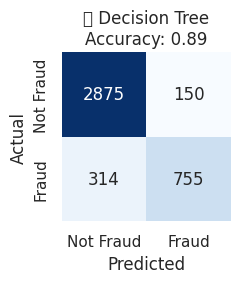

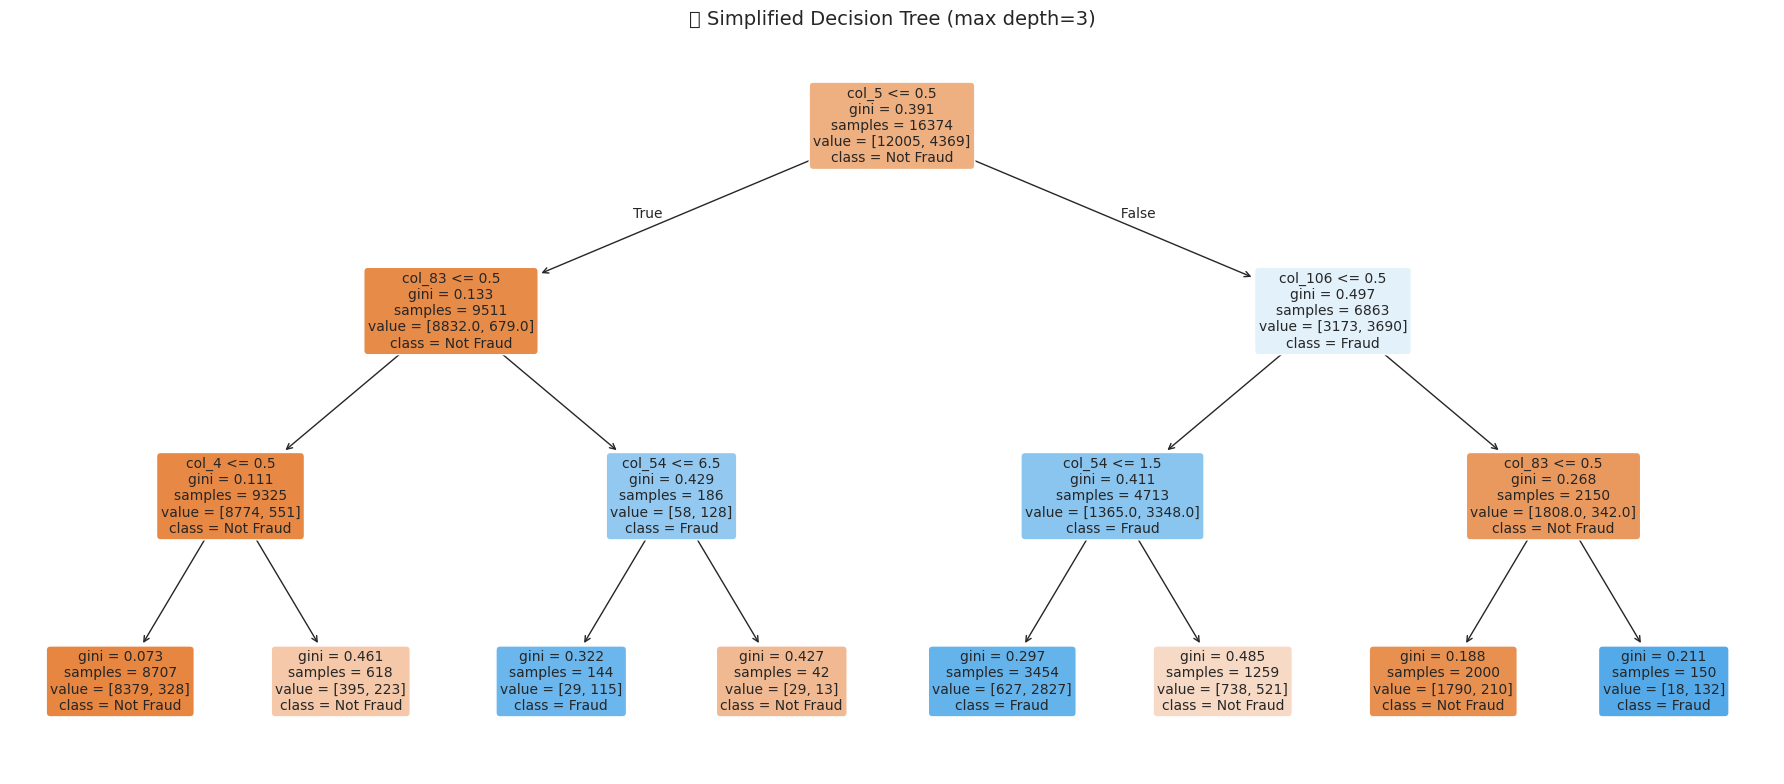


------------------------------------------------------------

------------------------------------------------------------


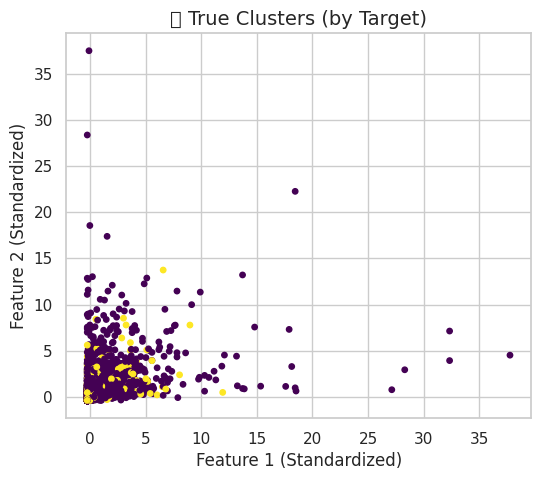


------------------------------------------------------------


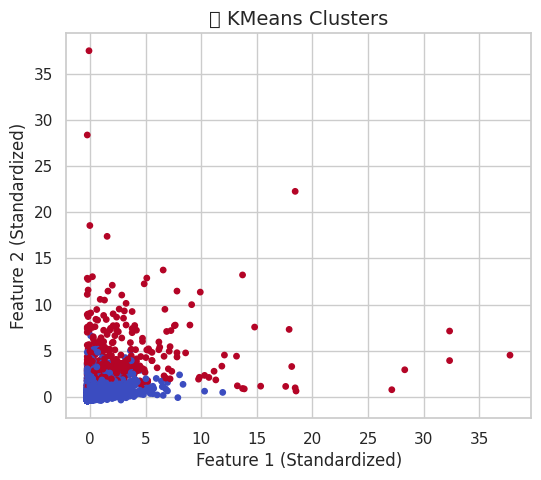


------------------------------------------------------------


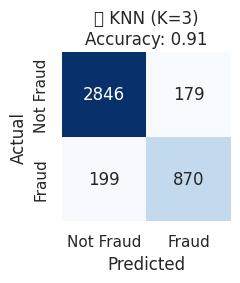


------------------------------------------------------------


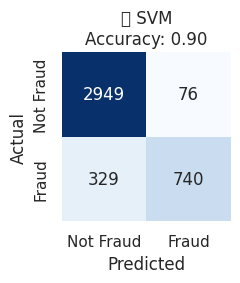


------------------------------------------------------------


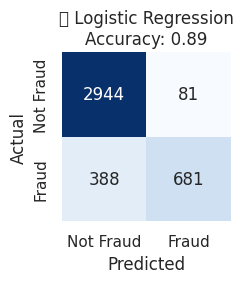


------------------------------------------------------------

📒 Linear Regression Predictions (Sample):
Predicted: [-0.04236596  0.20644314  0.71404799  0.17122263 -0.02177769]
Actual:    [0 1 1 0 1]

------------------------------------------------------------


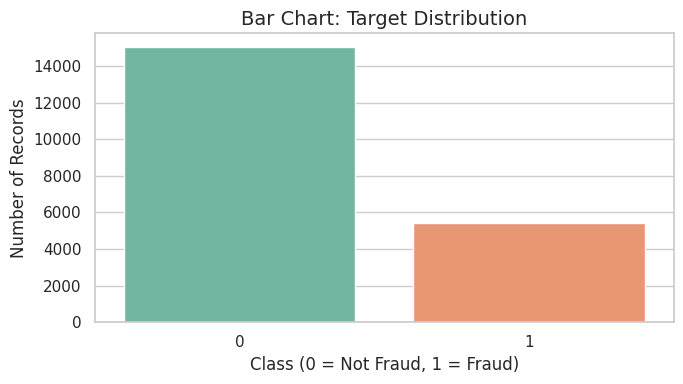


------------------------------------------------------------


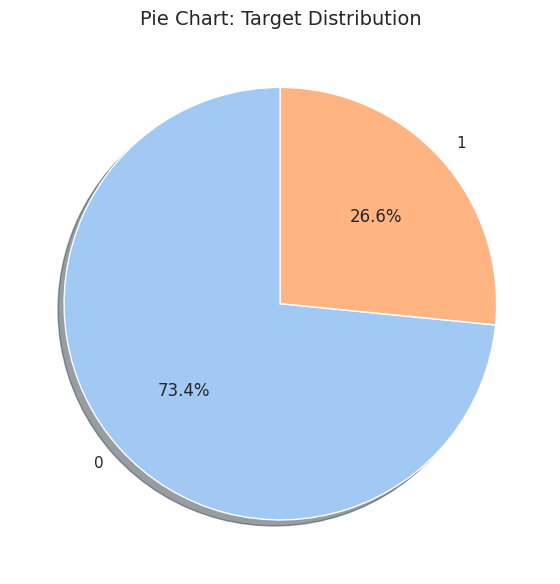


------------------------------------------------------------


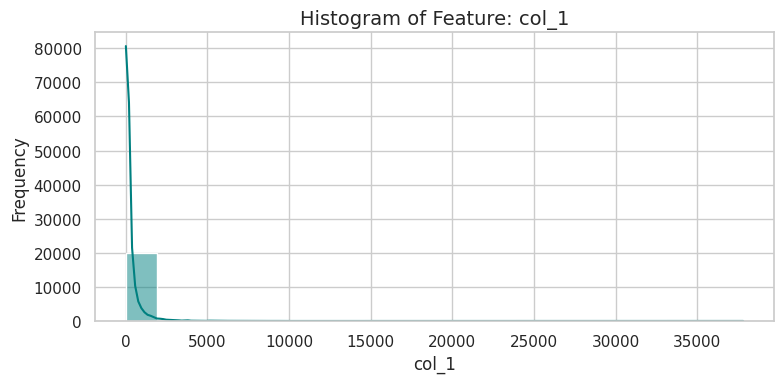


------------------------------------------------------------


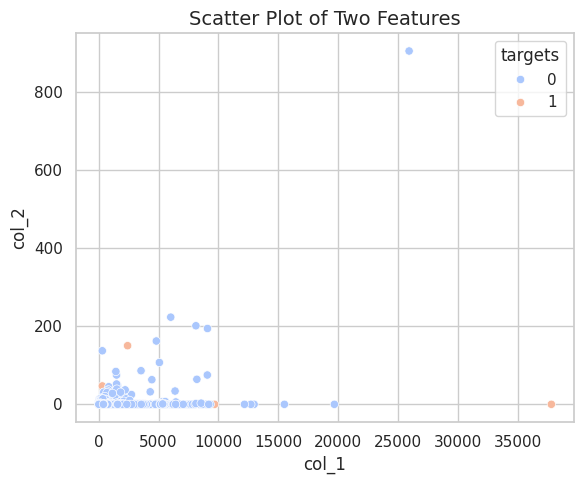


------------------------------------------------------------


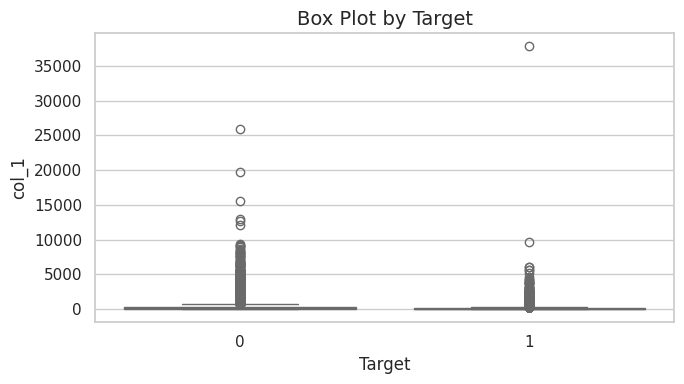


------------------------------------------------------------

✅ All models trained and visualizations complete.


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans

# ✅ Warnings off for cleaner output
warnings.filterwarnings("ignore")

# 📌 Style
sns.set_theme(style="whitegrid")

# 🎯 Load Dataset
df = pd.read_csv("/fraud_detection_bank_dataset.csv.zip")

# ✅ Basic Cleanup
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

print(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns.")

# 🎯 Target column
target = 'targets'
X = df.drop(target, axis=1)
y = df[target]

# 🧼 Handle nulls
if df.isnull().sum().sum() > 0:
    df = df.dropna()
print(f"✅ Dataset cleaned: {df.shape[0]} rows, {df.shape[1]} numeric columns.")

# 🧪 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======= 🔍 Helper Function for Matrix Plot =======
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"])
    plt.title(f"{title}\nAccuracy: {accuracy_score(y_true, y_pred):.2f}", fontsize=12)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ===================== 🤖 MACHINE LEARNING MODELS =====================

# 🌳 1. Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n" + "="*50)
print("🌳 Decision Tree Confusion Matrix")
plot_conf_matrix(y_test, y_pred_dt, "🌳 Decision Tree")

plt.figure(figsize=(18, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["Not Fraud", "Fraud"], rounded=True, fontsize=10)
plt.title("🌳 Simplified Decision Tree (max depth=3)", fontsize=14)
plt.tight_layout()
plt.show()
print("\n" + "-"*60)

# 📓 2. KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
print("\n" + "-"*60)

plt.figure(figsize=(6,5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', s=15)
plt.title("📌 True Clusters (by Target)", fontsize=14)
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()
print("\n" + "-"*60)

plt.figure(figsize=(6,5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans.labels_, cmap='coolwarm', s=15)
plt.title("📌 KMeans Clusters", fontsize=14)
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()
print("\n" + "-"*60)

# 📘 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
plot_conf_matrix(y_test, y_pred_knn, "📘 KNN (K=3)")
print("\n" + "-"*60)

# 📕 4. SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
plot_conf_matrix(y_test, y_pred_svm, "📕 SVM")
print("\n" + "-"*60)

# 📗 5. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
plot_conf_matrix(y_test, y_pred_log, "📗 Logistic Regression")
print("\n" + "-"*60)


# 📒 7. Linear Regression (for reference)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("\n📒 Linear Regression Predictions (Sample):")
print("Predicted:", y_pred_lr[:5])
print("Actual:   ", y_test.iloc[:5].values)
print("\n" + "-"*60)

# ===================== 🔍 DATA VISUALIZATION =====================

# 📊 Bar Chart
plt.figure(figsize=(7,4))
sns.countplot(x=target, data=df, hue=target, palette="Set2", legend=False)
plt.title("Bar Chart: Target Distribution", fontsize=14)
plt.xlabel("Class (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()
print("\n" + "-"*60)

# 📊 Pie Chart
plt.figure(figsize=(6,6))
df[target].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, colors=sns.color_palette("pastel"))
plt.title("Pie Chart: Target Distribution", fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()
print("\n" + "-"*60)

# 📊 Histogram
feature = df.columns[1]
plt.figure(figsize=(8,4))
sns.histplot(df[feature], bins=20, kde=True, color='teal')
plt.title(f"Histogram of Feature: {feature}", fontsize=14)
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
print("\n" + "-"*60)

# 📊 Scatter Plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=df.columns[1], y=df.columns[2], hue=target, data=df, palette="coolwarm")
plt.title("Scatter Plot of Two Features", fontsize=14)
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.tight_layout()
plt.show()
print("\n" + "-"*60)


# 📊 Box Plot
plt.figure(figsize=(7,4))
sns.boxplot(x=target, y=df.columns[1], data=df, palette="Set3")
plt.title("Box Plot by Target", fontsize=14)
plt.xlabel("Target")
plt.ylabel(df.columns[1])
plt.tight_layout()
plt.show()
print("\n" + "-"*60)

print("\n✅ All models trained and visualizations complete.")